In [ ]:
import pandas as pd


df = pd.read_csv('cleaned_ebay_deals.csv')
print(df.isnull().sum())
columns_to_check = ['price', 'original_price', 'shipping', 'discount_percentage']
df_cleaned = df.dropna()

print(df_cleaned.head())
print(df.isnull().sum())

timestamp              0
title                  0
price                  0
original_price         0
shipping               0
url                    0
discount_percentage    0
dtype: int64
             timestamp                                              title  \
0  2025-03-19 06:28:22  Klipsch R-120SWi 12" High-Performance Wireless...   
1  2025-03-19 06:28:22  Apple iPhone 14 Pro Max 128GB Network Unlocked...   
2  2025-03-19 06:28:22  Apple iPhone 14 Pro Max 256GB Unlocked Very Go...   
3  2025-03-19 06:28:22  Apple iPhone 14 Pro A2650 128GB Network Unlock...   
4  2025-03-19 06:28:22  Apple iPhone 14 128GB Network Unlocked Very Go...   

    price  original_price       shipping  \
0  159.99          179.99  Free shipping   
1  499.99         1099.00  Free shipping   
2  549.99         1199.00  Free shipping   
3  414.99          899.00  Free shipping   
4  305.99          749.00  Free shipping   

                                                 url  discount_percentage  
0  https

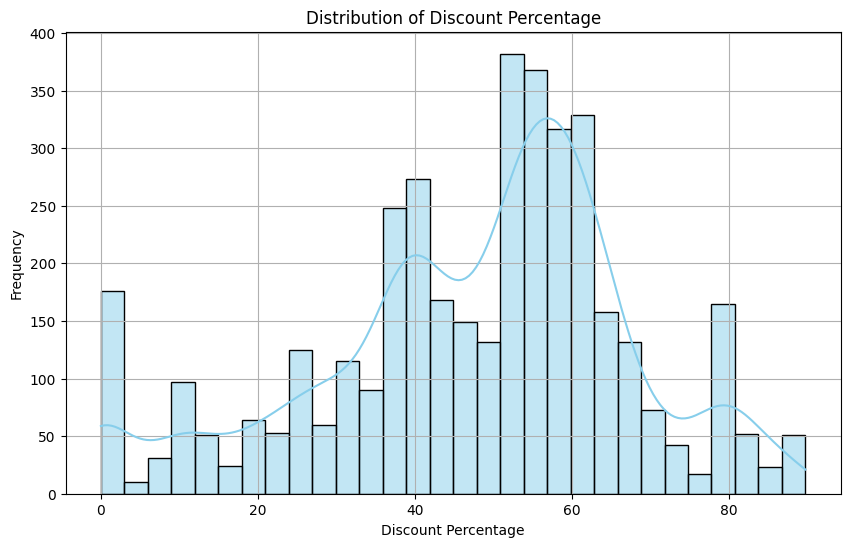

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            3975 non-null   object 
 1   title                3975 non-null   object 
 2   price                3975 non-null   float64
 3   original_price       3975 non-null   float64
 4   shipping             3975 non-null   object 
 5   url                  3975 non-null   object 
 6   discount_percentage  3975 non-null   float64
dtypes: float64(3), object(4)
memory usage: 217.5+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))


sns.histplot(df_cleaned['discount_percentage'], kde=True, bins=30, color='skyblue')


plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()
df_cleaned.info()

In [ ]:
#Part 3
#1)
#assign labels 'low', 'medium', 'high'
def categorize_discount(discount):
    if discount <= 10:
        return 'Low'
    elif discount <= 30:
        return 'Medium'
    else:
        return 'High'

#apply to the created column

df_cleaned['discount_bin'] = df_cleaned['discount_percentage'].apply(categorize_discount)


print(df_cleaned[['discount_percentage', 'discount_bin']].head(25))
df.info()


    discount_percentage discount_bin
0                 11.11       Medium
1                 54.51         High
2                 54.13         High
3                 53.84         High
4                 59.15         High
5                 54.46         High
6                 47.46         High
7                 49.22         High
8                 53.50         High
9                 62.38         High
10                58.23         High
11                71.76         High
12                17.90       Medium
13                44.80         High
14                61.22         High
15                30.35         High
16                40.95         High
17                44.96         High
18                51.95         High
19                81.55         High
20                74.97         High
21                54.32         High
22                66.08         High
23                48.71         High
24                55.87         High
<class 'pandas.core.frame.DataFrame'>


discount_bin
High      3226
Medium     488
Low        261
Name: count, dtype: int64


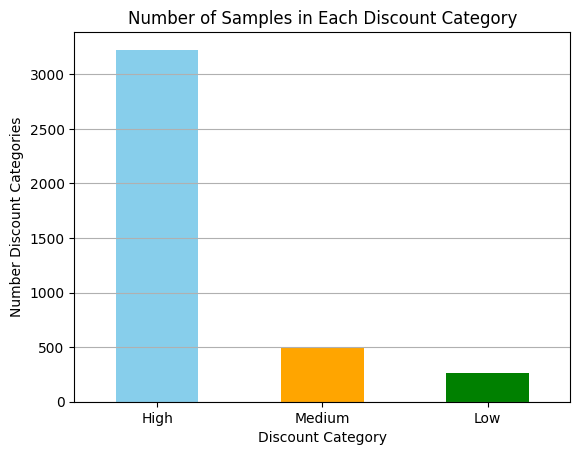

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            3975 non-null   object 
 1   title                3975 non-null   object 
 2   price                3975 non-null   float64
 3   original_price       3975 non-null   float64
 4   shipping             3975 non-null   object 
 5   url                  3975 non-null   object 
 6   discount_percentage  3975 non-null   float64
 7   discount_bin         3975 non-null   object 
dtypes: float64(3), object(5)
memory usage: 248.6+ KB


In [ ]:
#Part 3
#2)
#counting the samples
discount_counts = df_cleaned['discount_bin'].value_counts()
print(discount_counts)
#visualizing the samples counts
import matplotlib.pyplot as plt

discount_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Number of Samples in Each Discount Category')
plt.xlabel('Discount Category')
plt.ylabel('Number Discount Categories')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
df_cleaned.info()

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           3975 non-null   float64
 1   original_price  3975 non-null   float64
 2   shipping        3975 non-null   object 
dtypes: float64(2), object(1)
memory usage: 93.3+ KB


In [ ]:
def balance_by_discount_bin(df, bin_column='discount_bin', seed=42):

    bin_counts = df[bin_column].value_counts()
    min_count = bin_counts.min()


    balanced_parts = []


    for bin_value in bin_counts.index:
        bin_df = df[df[bin_column] == bin_value]
        sampled_bin_df = bin_df.sample(n=min_count, random_state=seed)
        balanced_parts.append(sampled_bin_df)

    # Concatenate all sampled parts into one balanced DataFrame
    balanced_df = pd.concat(balanced_parts).reset_index(drop=True)
    print(balanced_df['discount_bin'].value_counts())
    return balanced_df
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            3975 non-null   object 
 1   title                3975 non-null   object 
 2   price                3975 non-null   float64
 3   original_price       3975 non-null   float64
 4   shipping             3975 non-null   object 
 5   url                  3975 non-null   object 
 6   discount_percentage  3975 non-null   float64
 7   discount_bin         3975 non-null   object 
dtypes: float64(3), object(5)
memory usage: 248.6+ KB


In [ ]:
#Part 3
#4)

df_balanced = balance_by_discount_bin(df_cleaned)


df_balanced = df_balanced.drop(columns=['discount_bin'])


print(df_balanced.head())
df_cleaned.info()

discount_bin
High      261
Medium    261
Low       261
Name: count, dtype: int64
             timestamp                                              title  \
0  2025-03-28 18:33:52         Apple iPhone 14 128GB Unlocked - Excellent   
1  2025-03-22 05:23:37  Aura Studio 3, Wireless speaker with beautiful...   
2  2025-03-28 15:25:01  Bose QuietComfort Ultra Noise Cancelling Earbu...   
3  2025-03-22 15:23:28  Aura Studio 3, Wireless speaker with beautiful...   
4  2025-03-20 20:26:46  Samsung Galaxy S22 Ultra 5G S908U 128GB Unlock...   

    price  original_price                   shipping  \
0  340.95          799.00  Shipping info unavailable   
1   99.95          299.95  Shipping info unavailable   
2  159.00          264.00  Shipping info unavailable   
3   99.95          299.95  Shipping info unavailable   
4  329.99          499.99              Free shipping   

                                                 url  discount_percentage  
0  https://www.ebay.com/itm/186465664855?_t

Unique shipping values BEFORE cleaning:
['Free shipping' 'Shipping info unavailable']

Number of rows after cleaning: 1369
Missing values after cleaning:
price                  0
original_price         0
shipping               0
discount_percentage    0
dtype: int64

📊 Model Evaluation Metrics:
Mean Absolute Error (MAE):      52.8144
Mean Squared Error (MSE):       6878.0375
Root Mean Squared Error (RMSE): 82.9339
R² Score:                        0.9015


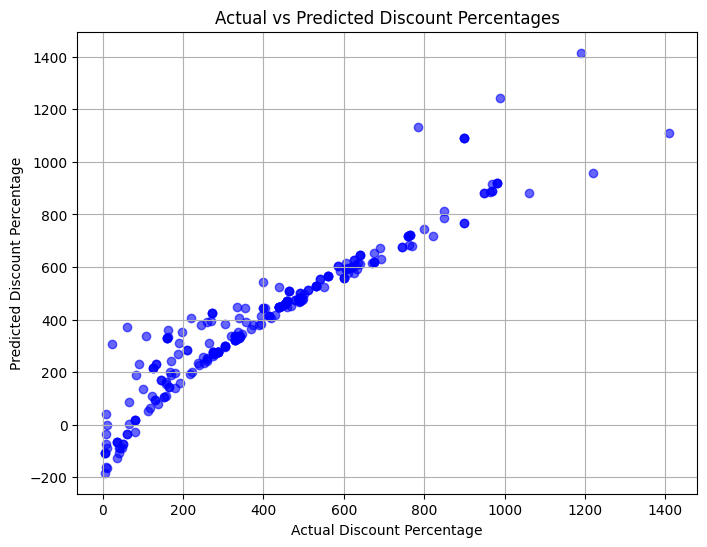

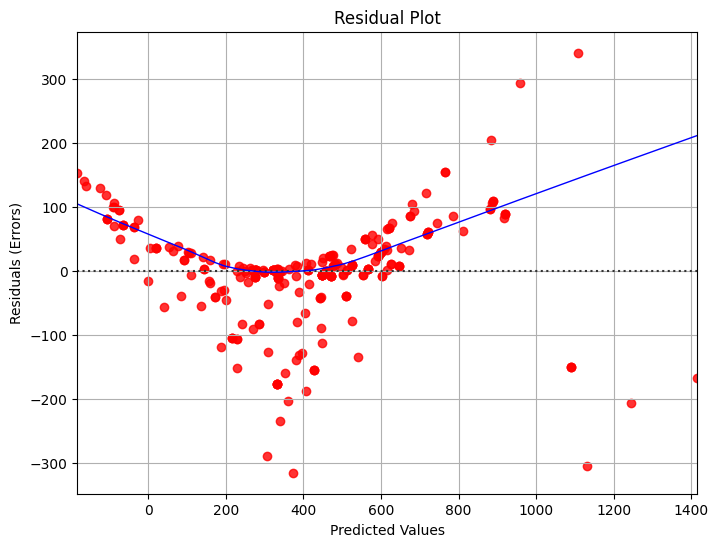

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import re

# Load the CSV
df = pd.read_csv('cleaned_ebay_deals.csv')
print("Unique shipping values BEFORE cleaning:")
print(df['shipping'].unique())

# Function to convert shipping column to numeric values
def parse_shipping(value):
    if isinstance(value, str):
        if 'free' in value.lower():
            return 0.0
        match = re.search(r'\$([\d\.]+)', value)
        if match:
            return float(match.group(1))
    return None  # for 'Shipping info unavailable' or missing

# Apply the shipping parser
df['shipping'] = df['shipping'].apply(parse_shipping)

# Keep only necessary columns
columns_to_use = ['price', 'original_price', 'shipping', 'discount_percentage']
df_cleaned = df[columns_to_use].dropna()

# Confirm number of rows
print(f"\nNumber of rows after cleaning: {len(df_cleaned)}")
print("Missing values after cleaning:")
print(df_cleaned.isnull().sum())

# Make sure there's data to proceed
if len(df_cleaned) == 0:
    print("No data left after cleaning. Cannot continue.")
else:
    # Set up features and target
    X = df_cleaned[['original_price', 'shipping', 'discount_percentage']]
    y = df_cleaned['price']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)


    print("\n Model Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE):      {mae:.4f}")
    print(f"Mean Squared Error (MSE):       {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score:                        {r2:.4f}")


    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.title('Actual vs Predicted Discount Percentages')
    plt.xlabel('Actual Discount Percentage')
    plt.ylabel('Predicted Discount Percentage')
    plt.grid(True)
    plt.show()


    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y_pred, y=residuals, lowess=True, color='red', line_kws={'color': 'blue', 'lw': 1})
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals (Errors)')
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression


df = pd.read_csv('cleaned_ebay_deals.csv')

# convert 'shipping' to numeric because it made error
df['shipping'] = pd.to_numeric(df['shipping'], errors='coerce')

df['shipping'] = df['shipping'].fillna(0)


df_cleaned = df[['price', 'original_price', 'shipping', 'discount_percentage']].dropna()


X = df_cleaned[['original_price', 'shipping']]
y = df_cleaned['discount_percentage']

# Train the model
model = LinearRegression()
model.fit(X, y)


df_without_discount = df.drop(columns=['discount_percentage'])


random_sample = df_without_discount[['title', 'price', 'original_price', 'shipping']].dropna()
sample_20 = random_sample.sample(n=20, random_state=42)

X_sample = sample_20[['original_price', 'shipping']]

# Predict discount_percentage
predicted_discount = model.predict(X_sample)


sample_20['predicted_discount_percentage'] = predicted_discount

sample_20['predicted_discount_percentage'] = sample_20['predicted_discount_percentage'].round(2)

results = sample_20[['title', 'price', 'original_price', 'shipping', 'predicted_discount_percentage']]
print("\nPredicted Discount for Selected Products:")
print(results)



Predicted Discount for Selected Products:
                                                  title    price  \
2355         Apple iPhone 14 128GB Unlocked - Excellent   340.95   
495   HP ENVY Laptop Intel Core Ultra 7 155U RTX 305...   769.99   
3893  Apple iPhone 14 Pro Max 256GB Unlocked Very Go...   559.99   
3154  Samsung Galaxy S21 5G SM-G991U 128GB 256GB Unl...   161.95   
1178  Apple iPhone 16 Pro Max 256GB Unlocked Excelle...   964.99   
1767  Samsung Galaxy S22 Ultra 5G S908U 128GB Unlock...   332.99   
1904  Acer PredatorNeo Laptop 16 16GB 1TB NVIDIA GeF...   899.99   
1723         Apple iPhone 13 128GB Unlocked - Excellent   285.95   
2414  Samsung Galaxy S22 Ultra 5G S908U 128GB Unlock...   332.99   
3662         Samsung Galaxy Watch4 44mm R870 GPS - Good    36.99   
3721  Samsung Galaxy S21 Ultra 5G 128GB G998U Unlock...   259.99   
2412     Apple iPhone 13 Pro 128GB Unlocked - Excellent   357.95   
511   Apple iPhone 14 Pro A2650 256GB Unlocked Very ...   439.99   
3063 